<a href="https://colab.research.google.com/github/MahammadNabi139/OIBSIP/blob/main/OASIS_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sumitted by DUDEKULA MAHAMMAD NABI

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
dataset = pd.read_csv('/content/spam.csv', encoding='latin-1', usecols = ['v1', 'v2'])
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


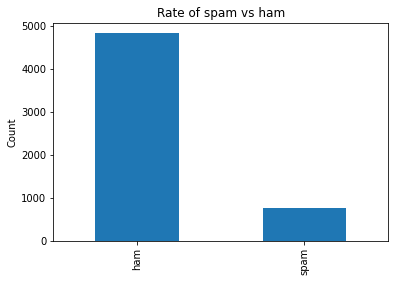

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num_of_spam_ham = dataset['v1'].value_counts()
num_of_spam_ham.plot(kind='bar')
plt.title('Rate of spam vs ham')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset['v1'].replace({'ham':1,'spam':0}, inplace=True)
dataset.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for i in range(0,len(dataset)):
    text = re.sub('[^a-zA-Z]', ' ', dataset['v2'][i])
    text = re.sub('http://\S+|https://\S+', ' ', dataset['v2'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    text = [ps.stem(word) for word in text if not word in list(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
corpus[:5]

['go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...',
 'ok lar... joke wif u oni...',
 "free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'",
 'u dun say earli hor... u c alreadi say...',
 'nah think goe usf, live around though']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=8300)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,0].values
X[:10,:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=2000, activation='relu'))
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=50,epochs=20)

Epoch 1/20
90/90 [==============================] - 21s 220ms/step - loss: 0.1901 - accuracy: 0.9441
Epoch 2/20
90/90 [==============================] - 20s 222ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 3/20
90/90 [==============================] - 20s 226ms/step - loss: 0.0021 - accuracy: 0.9987
Epoch 4/20
90/90 [==============================] - 20s 222ms/step - loss: 1.4256e-04 - accuracy: 1.0000
Epoch 5/20
90/90 [==============================] - 20s 221ms/step - loss: 4.7588e-05 - accuracy: 1.0000
Epoch 6/20
90/90 [==============================] - 20s 223ms/step - loss: 1.8823e-05 - accuracy: 1.0000
Epoch 7/20
90/90 [==============================] - 20s 223ms/step - loss: 4.3413e-05 - accuracy: 1.0000
Epoch 8/20
90/90 [==============================] - 19s 216ms/step - loss: 7.9751e-06 - accuracy: 1.0000
Epoch 9/20
90/90 [==============================] - 20s 222ms/step - loss: 5.0696e-06 - accuracy: 1.0000
Epoch 10/20
90/90 [==============================] - 27s 296ms/step

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

35/35 [==============================] - 1s 27ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(accuracy)

0.9757847533632287


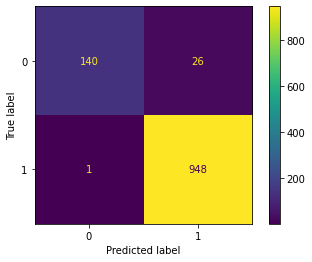

In [ ]:
import matplotlib.pyplot as plt
confusion_show = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_show.plot()

Thank you